In [1]:
import pandas as pd

In [2]:
dat=pd.read_csv("credit_history.csv")
dat.head()

,default,amount,grade,years,ownership,income,age
0,0,1000,B,2.0,RENT,19200.0,24
1,1,6500,A,2.0,MORTGAGE,66000.0,28
2,0,2400,A,2.0,RENT,60000.0,36
3,0,10000,C,3.0,RENT,62000.0,24
4,1,4000,C,2.0,RENT,20000.0,28


In [3]:
dat.isnull().sum()

default        0
amount         0
grade          0
years        279
ownership      0
income         0
age            0
dtype: int64

In [5]:
dat['years'].describe()

count    7448.000000
mean        6.086332
std         6.700758
min         0.000000
25%         2.000000
50%         4.000000
75%         8.000000
max        62.000000
Name: years, dtype: float64

<AxesSubplot:ylabel='Frequency'>

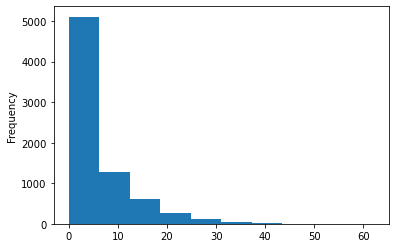

In [6]:
dat['years'].plot.hist()

In [7]:
dat['years'].fillna(4,inplace=True)

In [8]:
X=dat.drop("default",axis=1)

In [9]:
X.head()

,amount,grade,years,ownership,income,age
0,1000,B,2.0,RENT,19200.0,24
1,6500,A,2.0,MORTGAGE,66000.0,28
2,2400,A,2.0,RENT,60000.0,36
3,10000,C,3.0,RENT,62000.0,24
4,4000,C,2.0,RENT,20000.0,28


In [12]:
dat['grade'].value_counts()

B    2456
A    2099
C    1685
D    1066
E     309
F      82
G      30
Name: grade, dtype: int64

In [10]:
X=pd.get_dummies(X, drop_first=True)

In [13]:
X.head()

,amount,years,income,age,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,ownership_OTHER,ownership_OWN,ownership_RENT
0,1000,2.0,19200.0,24,1,0,0,0,0,0,0,0,1
1,6500,2.0,66000.0,28,0,0,0,0,0,0,0,0,0
2,2400,2.0,60000.0,36,0,0,0,0,0,0,0,0,1
3,10000,3.0,62000.0,24,0,1,0,0,0,0,0,0,1
4,4000,2.0,20000.0,28,0,1,0,0,0,0,0,0,1


In [14]:
y=dat['default']

In [15]:
import sklearn.model_selection as model_selection
X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,test_size=0.2,random_state=200)

In [48]:
#from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
clf = tree.DecisionTreeClassifier(max_depth=3,random_state=89, criterion = 'gini')

In [49]:
clf

DecisionTreeClassifier(max_depth=3, random_state=89)

In [50]:
# trained 
clf.fit(X_train,y_train)

# Check Score/Accuracy
clf.score(X_test,y_test)

0.6203104786545925

In [51]:
pred = clf.predict(X_train)
combined = pd.DataFrame({ 'Pred': pred,
                            'Actual': y_train })

In [52]:
from sklearn.metrics import accuracy_score
accuracy_score(combined['Actual'], combined['Pred'])

0.622552984953891

In [53]:
#error
1- accuracy_score(combined['Actual'], combined['Pred'])

0.377447015046109

In [56]:
import sklearn.metrics as metrics
metrics.roc_auc_score(y_test,clf.predict_proba(X_test)[:,1])

0.6234882070101656

[Text(167.4, 190.26, 'X[6] <= 0.5\ngini = 0.499\nsamples = 100.0%\nvalue = [0.525, 0.475]'),
 Text(83.7, 135.9, 'X[5] <= 0.5\ngini = 0.495\nsamples = 86.1%\nvalue = [0.552, 0.448]'),
 Text(41.85, 81.53999999999999, 'X[7] <= 0.5\ngini = 0.479\nsamples = 64.4%\nvalue = [0.603, 0.397]'),
 Text(20.925, 27.180000000000007, 'gini = 0.471\nsamples = 60.4%\nvalue = [0.621, 0.379]'),
 Text(62.775000000000006, 27.180000000000007, 'gini = 0.44\nsamples = 4.0%\nvalue = [0.327, 0.673]'),
 Text(125.55000000000001, 81.53999999999999, 'X[2] <= 52984.0\ngini = 0.481\nsamples = 21.7%\nvalue = [0.403, 0.597]'),
 Text(104.625, 27.180000000000007, 'gini = 0.44\nsamples = 11.3%\nvalue = [0.327, 0.673]'),
 Text(146.475, 27.180000000000007, 'gini = 0.499\nsamples = 10.5%\nvalue = [0.484, 0.516]'),
 Text(251.10000000000002, 135.9, 'X[2] <= 15457.5\ngini = 0.457\nsamples = 13.9%\nvalue = [0.353, 0.647]'),
 Text(209.25, 81.53999999999999, 'X[2] <= 9800.0\ngini = 0.087\nsamples = 0.4%\nvalue = [0.045, 0.955]'),
 

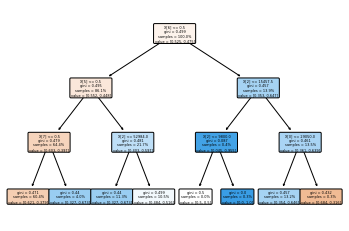

In [58]:
tree.plot_tree(clf,                         filled=True, rounded=True,proportion=True)

In [54]:
import graphviz

ModuleNotFoundError: No module named 'graphviz'

In [21]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=X.columns,  
                         class_names=["Not Defaulter","Defaulter"],  
                         filled=True, rounded=True,  
                         special_characters=True,proportion=True)

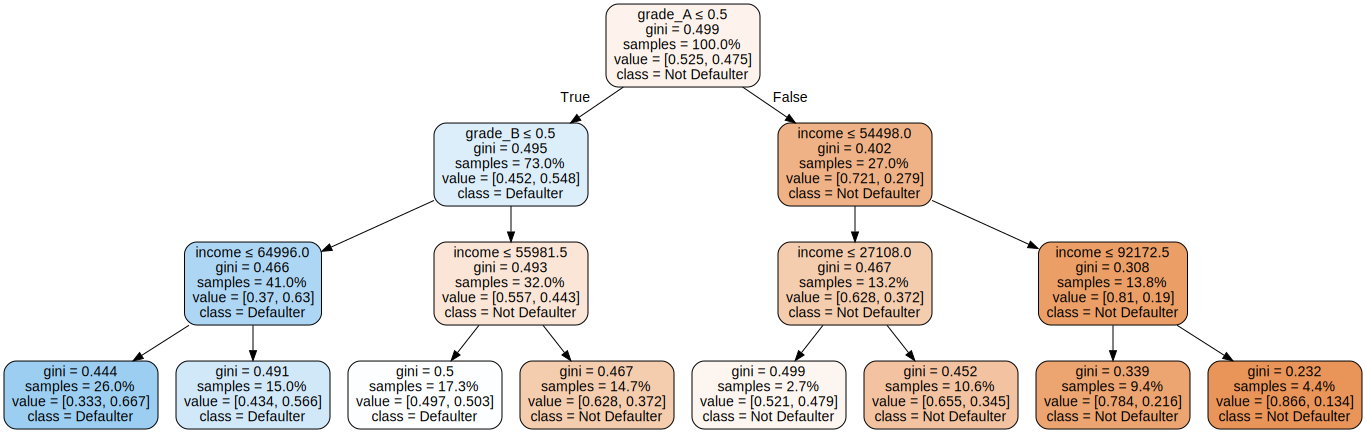

In [57]:
graph = graphviz.Source(dot_data)
graph

### Grid Search-Cross Validation

In [38]:
clf=tree.DecisionTreeClassifier(max_depth=3,random_state=200)

In [58]:
mod=model_selection.GridSearchCV(clf,param_grid={'max_depth':[5,10,15,20,25,30,35,40], 'criterion': ['gini', 'entropy'], })
mod.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=3,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=89,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                     

In [59]:
mod.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=89, splitter='best')

In [60]:
mod.best_score_

0.6256280854871243